# TASK4
The goal of this subtask is to develop your own model and use it to learn the sine function on the interval [0, 2π]. Discretize the interval with a suitable number of points (of your choice) and use the values of the sine function at these discretization points as labels.

Let's start by generating training and test data.
This function generates a dataset to learn the sine function over the interval $[0,2\pi]$. It discretizes the interval into `num_points` points, computes the sine of these points, shuffles the points, and then splits them into training and testing sets based on the test_split proportion.

In [13]:
import Modules.Utils

X_train, Y_train, X_test, Y_test = Modules.Utils.create_data(1000)

Model

(<Figure size 600x200 with 1 Axes>, <Axes: >)

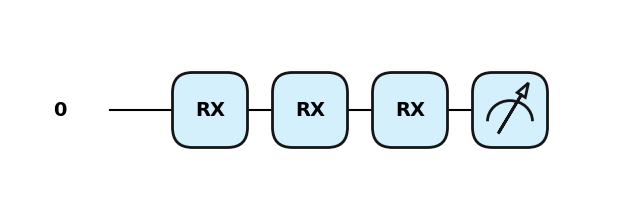

In [2]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device('default.qubit', wires=1)
@qml.qnode(dev)
def quantum_circuit(x,weights):
    # Encoding
    qml.RX(x, wires=0)
    # Ansatz
    qml.RX(weights[0], wires=0)
    qml.RX(weights[1], wires=0)
    return qml.expval(qml.PauliZ(wires=0))

#params = np.array([0.1,0.1,0.1],requires_grad=True)
weights = [0.2,0.3]
qml.draw_mpl(quantum_circuit, style='pennylane')(X_train[0], weights)
#quantum_circuit(0.1,params)
#quantum_circuit(X_train[0],weights)

In [9]:
def loss_func(predictions, targets):
    total_loss = 0
    for i in range(len(targets)):
        label = targets[i]
        prediction = predictions[i]
        loss = (prediction - label)**2
        total_loss += loss
    return total_loss/len(predictions)

def cost_fn(params, X, Y):
    # For a single value of the parameters we run the quantum circuit 10 times, once per datapoint(x)
    predictions = [quantum_circuit(x, params) for x in X]
    cost = loss_func(predictions, Y)
    return cost

In [35]:
max_iter = 100
opt = qml.GradientDescentOptimizer(stepsize=0.1)
init_params = np.array([0.1, 0.1], requires_grad=True)
max_iter = 500
all_cost =[]
all_params = []
all_accuracy = []

def optimization_routine(max_iter, opt, cost_fn, params, X, Y):
    # Iterate over a number of defined steps (max_iter)
    for i in range(max_iter):
        # At each step the parameters change to give a better cost
        [params,_,_], prev_cost = opt.step_and_cost(cost_fn,params,X,Y)
        if i%10 == 0:
            # We print the result after every 10 steps
            print(f'Step= {i} Cost = {cost_fn(params, X, Y)}')
    # Print the value of your optimized parameters
    print('Final parameters: ',params)
    return params
final_params = optimization_routine(max_iter, opt, cost_fn,init_params, X_train, Y_train)


Step= 0 Cost = 1597.1997102984953
Step= 10 Cost = 396.5522886326535
Step= 20 Cost = 615.4232813165019
Step= 30 Cost = 68.60038694023555
Step= 40 Cost = 1148.3313576329685
Step= 50 Cost = 1599.601237269234
Step= 60 Cost = 296.2801664591561
Step= 70 Cost = 34.36635626034181
Step= 80 Cost = 1567.280179826551
Step= 90 Cost = 829.9601123746295
Step= 100 Cost = 869.1680275599495
Step= 110 Cost = 1598.8548605067765
Step= 120 Cost = 223.23746603072283
Step= 130 Cost = 1.6866801415004304
Step= 140 Cost = 1491.9222293159316
Step= 150 Cost = 794.6616416820743
Step= 160 Cost = 176.68382066342937
Step= 170 Cost = 1552.9456559712444
Step= 180 Cost = 23.969246150192518
Step= 190 Cost = 28.29662690524974
Step= 200 Cost = 1102.4675972010496
Step= 210 Cost = 1132.3979028902318
Step= 220 Cost = 0.5023524298512415
Step= 230 Cost = 1244.1825624702196
Step= 240 Cost = 1046.2896488292827
Step= 250 Cost = 407.5091299068541
Step= 260 Cost = 1410.653987190929
Step= 270 Cost = 1396.2900291354563
Step= 280 Cost =

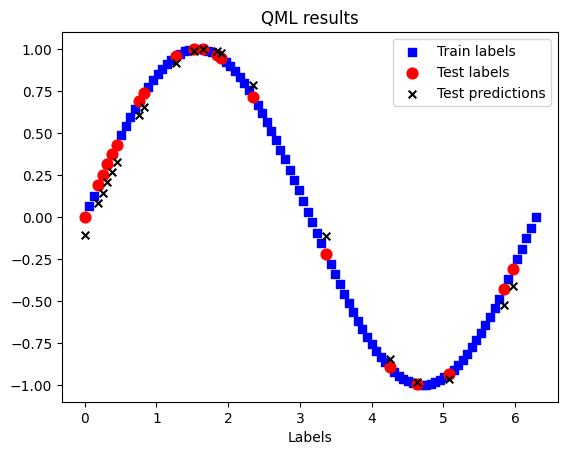

In [12]:
import matplotlib.pyplot as plt
test_predictions = [quantum_circuit(x_test, final_params) for x_test in X_test]

def plot_result(X,Y, X_test,Y_test, test_predictions):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.scatter(X,Y, s=30, c='b', marker='s',label='Train labels')
    ax1.scatter(X_test,Y_test,s=60, c='r', marker="o",label='Test labels')
    ax1.scatter(X_test,test_predictions, s=30, c='k', marker="x", label='Test predictions')

    plt.xlabel("Inputs")
    plt.xlabel("Labels")
    plt.title("QML results")

    plt.legend(loc='upper right')
    plt.show()

plot_result(X_train,Y_train,X_test,Y_test, test_predictions)

In [34]:
X = np.linspace(2 * np.pi, 4 * np.pi, 100)
X.requires_grad = False
Y = np.sin(X)

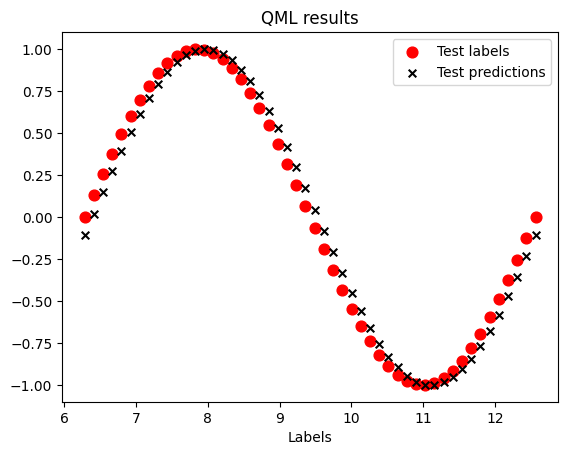

In [33]:
test_predictions = [quantum_circuit(x, final_params) for x in X]

def plot_result(X_test,Y_test, test_predictions):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.scatter(X_test,Y_test,s=60, c='r', marker="o",label='Test labels')
    ax1.scatter(X_test,test_predictions, s=30, c='k', marker="x", label='Test predictions')

    plt.xlabel("Inputs")
    plt.xlabel("Labels")
    plt.title("QML results")

    plt.legend(loc='upper right')
    plt.show()

plot_result(X,Y, test_predictions)